## Logistic Regression:
- Logistic Regression is used when the dependent variable(target) is categorical.
<img src='./Image/10.1 Image a.jpg' width='80%' height='30%'/>

where x1, x2 are features
- It uses a log of odds as the dependent variable. Logistic Regression predicts the probability of occurrence of a binary event utilizing a logit function.
- The dependent variable in logistic regression follows Bernoulli Distribution.
- Estimation is done through Maximum Likelihood Estimation (MLE) approach.
- MLE sets the mean and variance as parameters in determining the specific parametric values for a given model.
- MLE assumes a joint probability mass function.

## Types of Logistic Regression:
**1. Binary Logistic Regression:** The categorical response has only two 2 possible outcomes. **Ex:** Spam or Not
<img src='Image/10.1 Image c.PNG' width='50%' height='30%'/>
<img src='Image/10.1 Image d.PNG' width='50%' height='30%'/>

**2. Multinomial Logistic Regression:** Three or more categories without ordering. **Ex:** Predicting which food is preferred more (Veg, Non-Veg, Vegan)

**3. Ordinal Logistic Regression:** Three or more categories with ordering. **Ex:** Movie rating from 1 to 5

## Decision Boundary: 
To predict which class a data belongs, a threshold can be set. Based upon this threshold, the obtained estimated probability(p̂) is classified into classes.
<img src='Image/10.1 Image b.PNG' width='60%' height='60%'/>
- Decision boundary can be linear or non-linear. Polynomial order can be increased to get complex decision boundary.

## Cost Function: 
**Ques:** Why cost function which has been used for linear can not be used for logistic?

**Ans:** Linear regression uses mean squared error as its cost function. If this is used for logistic regression, then it will be a non-convex function of parameters (theta). Gradient descent will converge into global minimum only if the function is convex.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()

In [3]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

<img src='./Image/10.1 Image e.PNG' width='70%' height='80%'/>

In [4]:
iris.data.shape

(150, 4)

In [5]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [6]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [7]:
np.bincount(iris.target)

array([50, 50, 50], dtype=int64)

In [8]:
df1 = pd.DataFrame(iris.data, columns = iris.feature_names)
df1.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [9]:
df2 = pd.DataFrame(iris.target, columns = ['target'])
df2.head()

,target
0,0
1,0
2,0
3,0
4,0


In [10]:
df = pd.concat((df1, df2), axis=1)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [11]:
df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


In [12]:
df.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
sepal length (cm),1.000000,-0.117570,0.871754,0.817941,0.782561
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal length (cm),0.871754,-0.428440,1.000000,0.962865,0.949035
petal width (cm),0.817941,-0.366126,0.962865,1.000000,0.956547
target,0.782561,-0.426658,0.949035,0.956547,1.000000


In [13]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


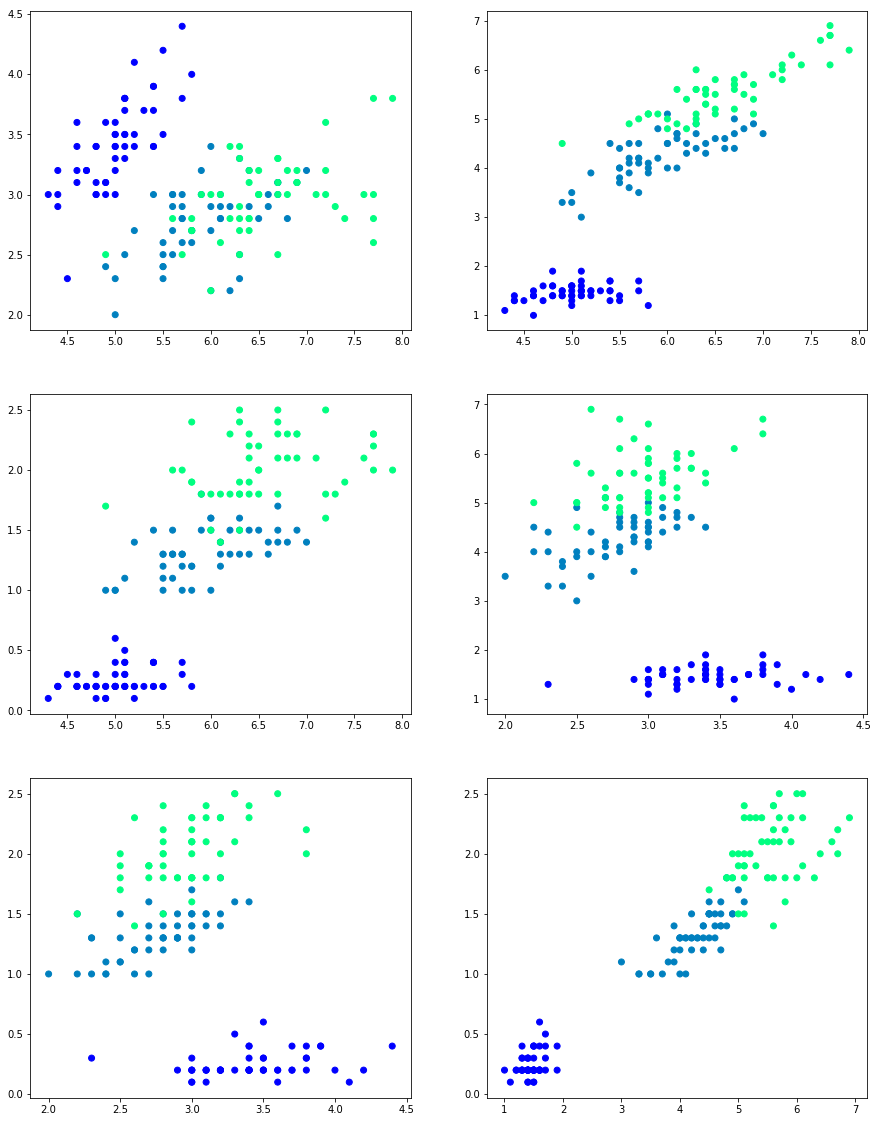

In [14]:
plt.figure(figsize=(15,20))
# Plot for column 0 & 1:
plt.subplot(3,2,1)
plt.scatter(df.iloc[:, 0].values, df.iloc[:, 1].values, c=df.target, cmap='winter')

plt.subplot(3,2,2)
plt.scatter(df.iloc[:, 0].values, df.iloc[:, 2].values, c=df.target, cmap='winter')

plt.subplot(3,2,3)
plt.scatter(df.iloc[:, 0].values, df.iloc[:, 3].values, c=df.target, cmap='winter')

plt.subplot(3,2,4)
plt.scatter(df.iloc[:, 1].values, df.iloc[:, 2].values, c=df.target, cmap='winter')

plt.subplot(3,2,5)
plt.scatter(df.iloc[:, 1].values, df.iloc[:, 3].values, c=df.target, cmap='winter')

plt.subplot(3,2,6)
plt.scatter(df.iloc[:, 2].values, df.iloc[:, 3].values, c=df.target, cmap='winter')

Above plot shows that feature in column 2 & 3 are more important for better prediction.

In [15]:
x = df.iloc[50: , 2:-1].values
y = df.iloc[50: , -1].values

In [16]:
x.shape

(100, 2)

In [17]:
y.shape

(100,)

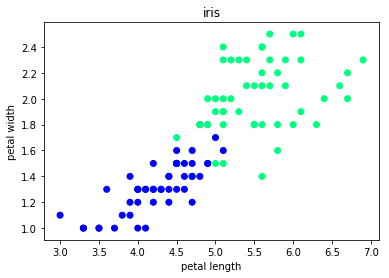

In [18]:
plt.scatter(x[:, 0], x[:, 1], c = df.iloc[50: ,-1], cmap = 'winter')
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.title('iris')
plt.show()

In [19]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.20, random_state=0, shuffle=True)

In [20]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(C=1, solver='liblinear')
log.fit(x_train, y_train)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

### Regularization:
- L2 regularization is 'ON' by default(like ridge regression).
- **Parameter C** controls amount of regularization (default 1.0).
- As with regularized linear regresion, it can be important to normalize all features so that they are on the same scale.
- **The strength of regularization is determined by C:**
   - Large value of C: less regularization
     - Fit the training data as well, as possible.
     - Each individual data point is important to classify correctly.
   - Smaller value of C: more regularization
     - More tolerance of errors on individual data points. 

In [21]:
y_pred = log.predict(x_test)

In [22]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

In [23]:
confusion_matrix(y_test, y_pred)

array([[ 9,  1],
       [ 0, 10]], dtype=int64)

In [24]:
## Reading the confusion matrix:
#             Actual 0  Actual 1
# Predicted 0   TN         FP
# Predicted 1   FN         TP

### Model Evaluation using Confusion Matrix:
A confusion matrix is a table that is used to evaluate the performance of a classification model. You can also visualize the performance of an algorithm. The fundamental of a confusion matrix is the number of correct and incorrect predictions are summed up class-wise.

### Model Evaluation using Accuracy Score:
- **Accuracy:** Classification accuracy is the number of correct predictions made as a ratio of all predictions made.

In [25]:
accuracy_score(y_test, y_pred)

0.95

In [26]:
co = log.coef_
log.coef_

array([[0.02575161, 2.00152055]])

In [27]:
log.intercept_

array([-3.25612282])

In [28]:
w = log.coef_[0]
a = -(w[0] / w[1])

In [29]:
x1 = np.linspace(3.0,7.0,50)
x2 = a*x1 + ((-log.intercept_[0]) / w[1])

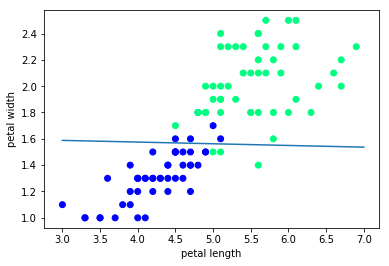

In [30]:
plt.plot(x1, x2)
plt.scatter(x[:,0], x[:,1], c= iris.target[50: ], cmap='winter')
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.show()

when C=0.001
train score: 0.5
test score: 0.5


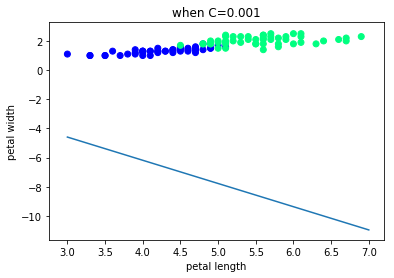

when C=0.01
train score: 0.5
test score: 0.5


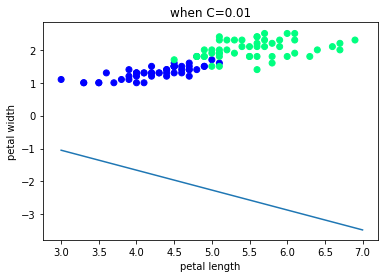

when C=1
train score: 0.9125
test score: 0.95


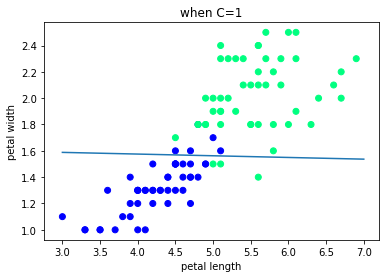

when C=10
train score: 0.9375
test score: 0.95


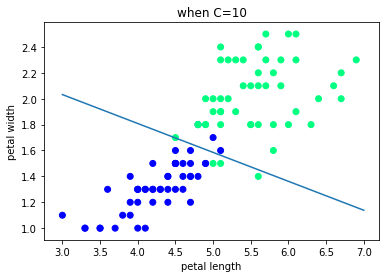

when C=100
train score: 0.95
test score: 0.95


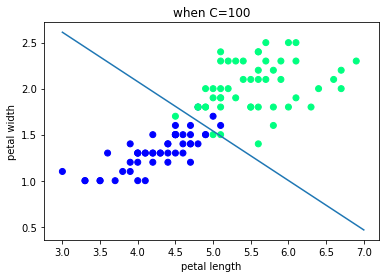

In [32]:
for i in [.001,.01,1,10,100]:
    log = LogisticRegression(C=i, solver='liblinear')
    log.fit(x_train,y_train)
    print('when C={}'.format(i))
    print('train score:',log.score(x_train,y_train))
    print('test score:',log.score(x_test,y_test))
    w = log.coef_[0]
    a = -(w[0] / w[1])
    x1 = np.linspace(3.0,7.0,50)
    x2 = a*x1 + ((-log.intercept_[0]) / w[1])
    plt.plot(x1, x2)
    plt.scatter(x[:,0], x[:,1], c= iris.target[50: ], cmap='winter')
    plt.title(f'when C={i}')
    plt.xlabel('petal length')
    plt.ylabel('petal width')
    plt.show()